<a href="https://colab.research.google.com/github/ajitjaison/Datathons/blob/master/BankNote_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BankNote - Predict is a note is genuine or not
##Deep Learning Bootcamp - Assignment 1 - Beginners on <font color='green'>DPhi</font>
#### Author: Jaison AJ


### Loading Libraries

In [1]:
import pandas as pd
import numpy as np

###Loading Dataset

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv" )

###Loading Dataset

In [3]:
train_data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VWTI    1096 non-null   float64
 1   SWTI    1096 non-null   float64
 2   CWTI    1096 non-null   float64
 3   EI      1096 non-null   float64
 4   Class   1096 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 42.9 KB


In [5]:
train_data.describe()

,VWTI,SWTI,CWTI,EI,Class
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.448500,1.780643,1.493533,-1.157454,0.445255
std,2.852623,5.922621,4.375655,2.084983,0.497221
min,-7.036400,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.790850,-2.125200,-1.574975,-2.246975,0.000000
50%,0.540430,2.205850,0.671900,-0.569190,0.000000
75%,2.835350,6.793925,3.574450,0.399980,1.000000
max,6.563300,12.730200,17.927400,2.449500,1.000000


### Data Preprocessing

In [6]:
X = train_data.drop(['Class'], axis=1)
y = train_data.Class

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
train_data_scaled = scaler.transform(X)

In [8]:
#Convert to dataframe
train_data_df = pd.DataFrame(data = X, index= X.index, columns= X.columns)
train_data_df.describe()

,VWTI,SWTI,CWTI,EI
count,1096.000000,1096.000000,1096.000000,1096.000000
mean,0.448500,1.780643,1.493533,-1.157454
std,2.852623,5.922621,4.375655,2.084983
min,-7.036400,-13.773100,-5.286100,-8.548200
25%,-1.790850,-2.125200,-1.574975,-2.246975
50%,0.540430,2.205850,0.671900,-0.569190
75%,2.835350,6.793925,3.574450,0.399980
max,6.563300,12.730200,17.927400,2.449500


In [10]:
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                          random_state=42)

In [11]:
X_train.shape

(876, 4)

###Build the Model

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow

In [15]:
# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))   
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.001)  # Here, we have set our learning rate as 0.001
model.compile(loss='binary_crossentropy', 
              optimizer= optimizer , 
              metrics=['accuracy'])

In [17]:
# printing the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


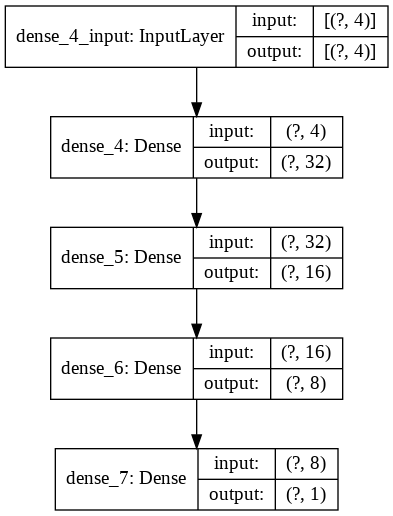

In [18]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [19]:
history = model.fit(X_train, 
                    y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    verbose=1)

Epoch 1/50
22/22 [==============================] - 0s 11ms/step - loss: 0.5817 - accuracy: 0.6929 - val_loss: 0.4908 - val_accuracy: 0.8295
Epoch 2/50
22/22 [==============================] - 0s 3ms/step - loss: 0.4245 - accuracy: 0.9314 - val_loss: 0.3550 - val_accuracy: 0.9830
Epoch 3/50
22/22 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.9900 - val_loss: 0.2365 - val_accuracy: 0.9886
Epoch 4/50
22/22 [==============================] - 0s 2ms/step - loss: 0.1975 - accuracy: 0.9914 - val_loss: 0.1553 - val_accuracy: 0.9943
Epoch 5/50
22/22 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.9986 - val_loss: 0.0972 - val_accuracy: 1.0000
Epoch 6/50
22/22 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.9986 - val_loss: 0.0575 - val_accuracy: 1.0000
Epoch 7/50
22/22 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 1.0000
Epoch 8/50
22/22 [=

In [20]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 5.6435e-08 - accuracy: 1.0000


[5.643484612960492e-08, 1.0]

In [21]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv')

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(test_data)

#Scale and centre the data

test_data_scaled = scaler.transform(test_data)

#Create a pandas dataframe

test_data_df = pd.DataFrame(data = test_data, 
                            index= test_data.index, 
                            columns= test_data.columns)

In [25]:
# make a prediction
y_pred = model.predict_classes(test_data_df)

In [26]:
res = pd.DataFrame(y_pred) 
res.index = test_data.index
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('Bank_Note_Sub.csv')         
files.download('Bank_Note_Sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>